## 2. Data Encoding

2.1: Read in Data as Strings

In [1]:
import pandas as pd
import numpy as np
from html import parser

In [2]:
df = pd.read_csv('data/spam.csv', encoding = 'latin1') 
df = df.rename(index=str, columns={"v1": "classification", "v2": "message"})
#cleaning data, remove HTML encodings from dataset
df['message'] = df['message'].apply(parser.unescape)
df.head()

,classification,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words='english')
bag_words = count_vect.fit_transform(df['message'])
print(bag_words.shape) # this is a sparse matrix
print('=========')
print(bag_words[0])
count_vect.inverse_transform(bag_words[0])

(5572, 8419)
  (0, 8049)	1
  (0, 1055)	1
  (0, 3504)	1
  (0, 2001)	1
  (0, 1707)	1
  (0, 4364)	1
  (0, 8253)	1
  (0, 3544)	1
  (0, 1709)	1
  (0, 1274)	1
  (0, 2278)	1
  (0, 5759)	1
  (0, 4239)	1


[array(['wat', 'amore', 'got', 'cine', 'buffet', 'la', 'world', 'great',
        'bugis', 'available', 'crazy', 'point', 'jurong'], 
       dtype='<U34')]

2.2/2.3: veryfy data quality (remove stop words)

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(stop_words='english')
tfidf_mat = tfidf_vect.fit_transform(df['message'])
df_tfidf = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
df_tfidf.head()

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zouk,zyada,æãëud,ê_,ê_1,êën,ô_,ô_10,ô_harry,ô_it
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# print out 10 words with max tfidf, normalized by document occurrence
df_tfidf.max().sort_values()[-10:]

hey            1.0
sec            1.0
pick           1.0
enc            1.0
sent           1.0
way            1.0
christmassy    1.0
anytime        1.0
laptop         1.0
business       1.0
dtype: float64

According to this, 15.5% of the entries are spam. At a high level, this seems reasonable enough to classify texts as spam vs not spam, without overfitting a model too heavily towards spam.

In [6]:
df['classification'].value_counts()

ham     4825
spam     747
Name: classification, dtype: int64

## 4. Word Cloud

Our work cloud code was adapted from [here](https://github.com/amueller/word_cloud/blob/master/examples/masked.py)

Image Source: Lucas Hansen

In [7]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

spam.png


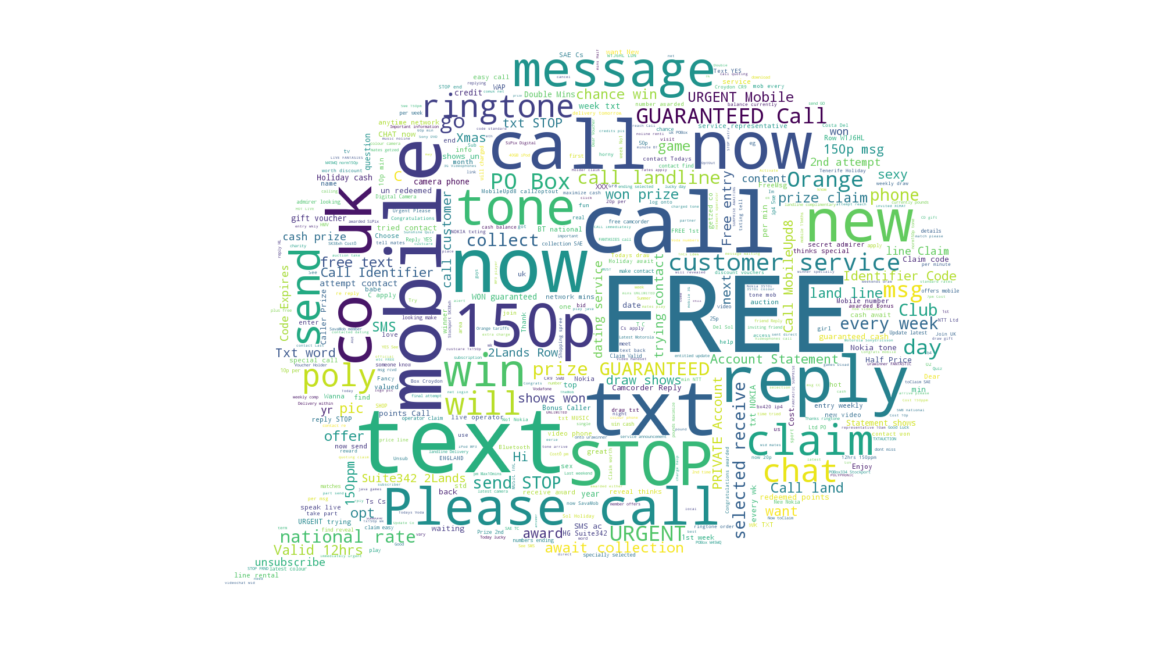

ham.png


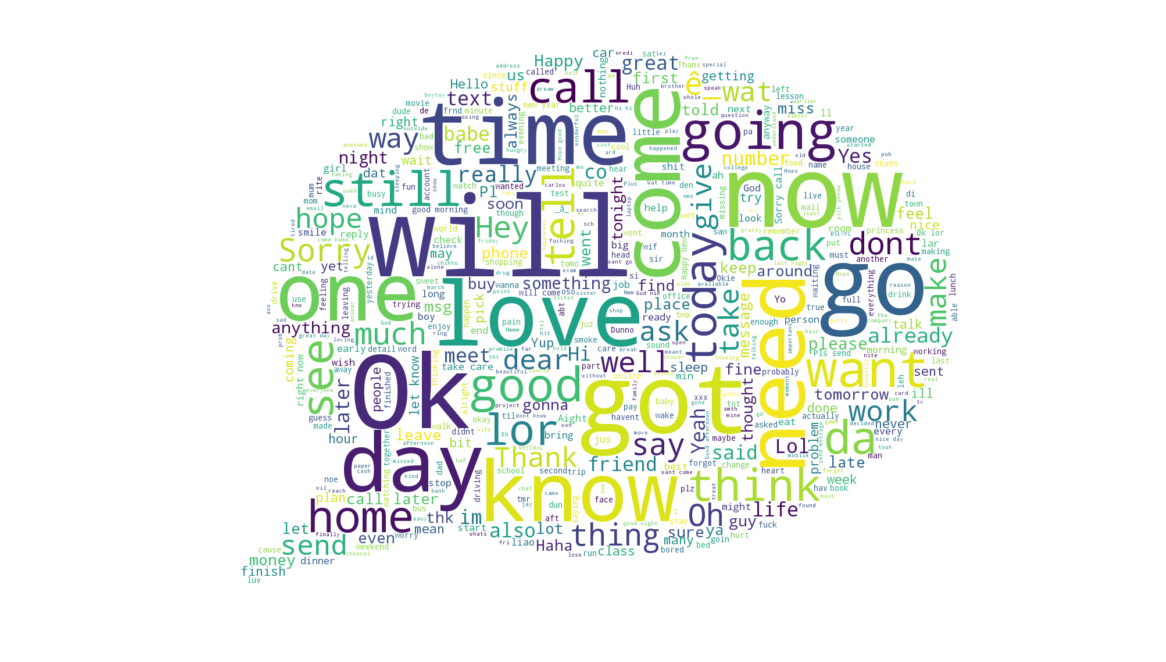

all.png


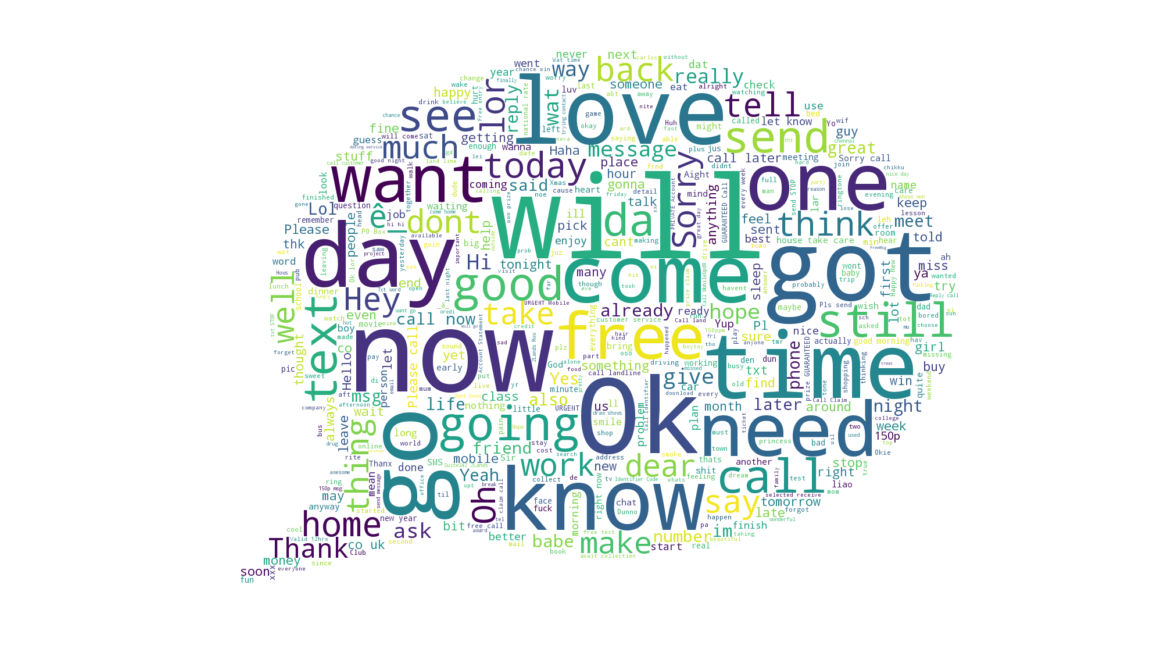

In [8]:
for df_col_wc, outFile in ((df[df["classification"] == "spam"]["message"],"spam.png",),
                       (df[df["classification"] == "ham"]["message"], "ham.png",),
                       (df["message"], "all.png",),):
    print(outFile)
    # Read the whole text.
    text = ' '.join(df_col_wc)
    sms_mask = np.array(Image.open("data/black_sms.png"))
    stopwords = set(STOPWORDS)
    stopwords.add("lt")
    stopwords.add("gt")
    stopwords.add("ur")
    
    wc = WordCloud(background_color="white", max_words=500, mask=sms_mask,
               stopwords=stopwords)
    # generate word cloud
    wc.generate(text)

    # store to file
    wc.to_file("data/"+outFile)
    
    plt.figure(figsize=(20, 20))
    # show
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

We showed the word cloud in 3 different ways:

1. The Spam subsection prominently shows words that we would relate to spam; Words like "FREE", "call, "now" and "win"
2. The Ham (non-spam) subsection contains words we would interpret as more "personal". Words like: "love", "home" and "will"
3. The Entire corpus does not seem to have many words that are also categorized as Spam. This is not surprising, sonsidering 85% on of the text data was classified as Ham/Not-spam.

## 3. Visualization

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
df_vp = df.copy()
df_vp["char_count"] = df_vp["message"].apply(lambda x: len(x))
df_vp["word_count"] = df_vp["message"].apply(lambda x: len(x.split()))

Graphing message length with word count and character count might tell us something about the message structure of a spam vs ham message.

In [10]:
df_vp.head()

,classification,message,char_count,word_count
0,ham,"Go until jurong point, crazy.. Available only ...",111,20
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,ham,U dun say so early hor... U c already then say...,49,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13


In [11]:
df_vp[df_vp['classification'] == "ham"]['char_count'].mean()/df_vp[df_vp['classification'] == "ham"]['word_count'].mean()

4.968927872967687

In [12]:
df_vp[df_vp['classification'] == "spam"]['char_count'].mean()/df_vp[df_vp['classification'] == "spam"]['word_count'].mean()

5.8221361620923835

The above ratios tell us that spam messages, on average, contain words that are ~1 character longer than Ham messages

In [13]:
df_vp[df_vp['classification'] == "ham"].describe()

,char_count,word_count
count,4825.000000,4825.000000
mean,70.561865,14.200622
std,57.336442,11.424511
min,2.000000,1.000000
25%,33.000000,7.000000
50%,52.000000,11.000000
75%,91.000000,19.000000
max,910.000000,171.000000


In [14]:
df_vp[df_vp['classification'] == "spam"].describe()

,char_count,word_count
count,747.000000,747.000000
mean,138.866131,23.851406
std,29.183082,5.811898
min,13.000000,2.000000
25%,132.500000,22.000000
50%,149.000000,25.000000
75%,157.000000,28.000000
max,224.000000,35.000000


In [15]:
#remove extreme outliers, so that graphing the violinplots look better
df_vp = df_vp[df_vp['message'].map(len) < 250]

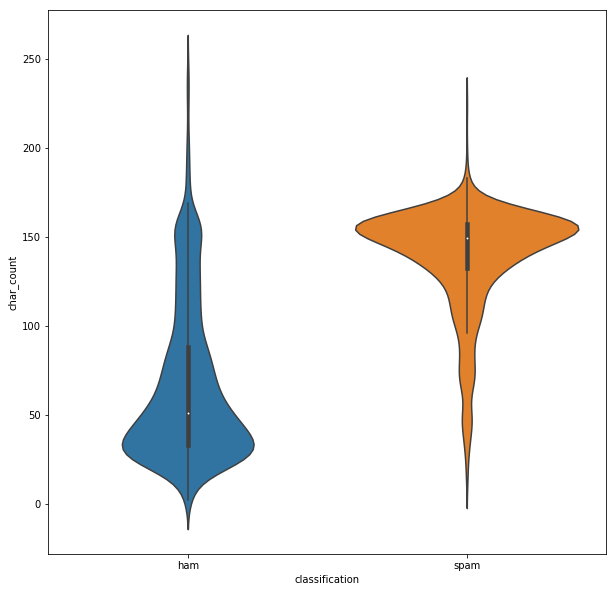

In [16]:
f, ax = plt.subplots(figsize=(10, 10))
sns.violinplot(x="classification", y="char_count", data=df_vp)
plt.show()

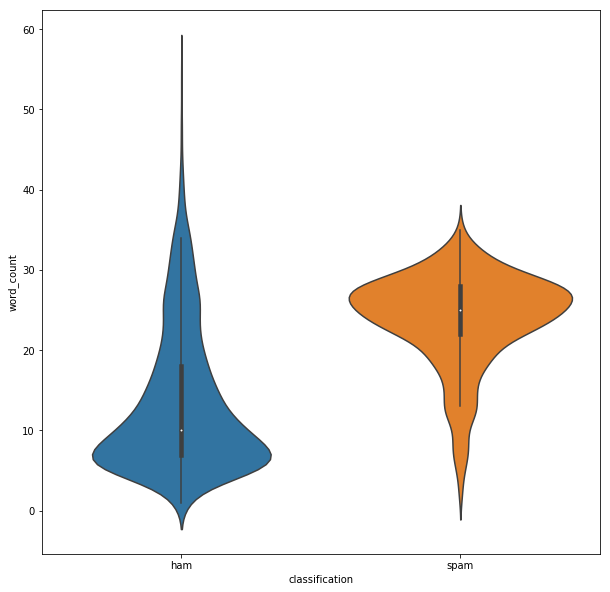

In [17]:
f, ax = plt.subplots(figsize=(10, 10))
sns.violinplot(x="classification", y="word_count", data=df_vp)
plt.show()

Using a violin plot, we can determine that Ham messages are much more likely to be shorter than Spam. The mean character length for Spam is (139-71)= 68 chracters greater than Ham messages. This this allows us to infer that Spam messages are longer because spammers/scammers need more text/data in order to convince/influence their subjects. While people normally comminicate with succinct messages.


Note: The character counts that go well above the SMS limit of 160 are concatenated messages provided in the dataset.